### Carregar bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Carregar dados

In [2]:
dados = pd.read_csv('dados/winequality.csv', sep=';')

dados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Binarizar atributo 'type'

In [3]:
dados.type.unique()

array(['White', 'Red'], dtype=object)

In [4]:
dados = pd.get_dummies(dados, columns=['type'])

dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


### Tratar atributo 'alcohol'

Estratégia para tratar esse atributo é:
- Identificar os valores que estão fora do normal (com vários separadores ".")
- Considerar apenas os números que estão antes do primeiro separador. Exemplo: valor "973.333.333.333.333" será transformado para "973"
- Converter o atributo para o tipo "float"

In [5]:
dados.alcohol.unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [6]:
def tratarAlcohol(valor):
    """
    Função que recebe um valor, verifica se existe mais de um separador ('.'), se existir quebra o valor pelo separador '.', e retorna apenas os números que estão antes do primeiro separador.
    Caso existe somente um separador ('.') ou nenhum separador, é retornado o valor da forma original, sem nenhuma alteração.
    """
    if valor.count('.') > 1:
        return valor.split('.')[0]
    return valor

In [7]:
dados.alcohol = dados.alcohol.map(tratarAlcohol)

dados.alcohol.unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128', '114', '10.98', '100', '105', '953', '109', '113',
       '110', '973', '11.05', '9.75', '11.35', '9.55', '10.55', '11.45',
       '14.05', '123', '12.75', '13.8', '12.15', '13.05', '112', '117',
       '11.75', '10.65', '101', '10.15', '104', '116', '12.25', '11.85',
       '11.65', '13.55', '131', '11.95', '120', '11.55', '963', '12.05',
       '14.9', '956', '135', '9.95', '923', '9.25', '9.05', '10.75'],
      dtype=object)

In [8]:
dados.alcohol = dados.alcohol.astype('float64') # Converter atributo para o tipo float

dados.alcohol.dtype

dtype('float64')

##### Visualizar outliers do atributo 'alcohol'

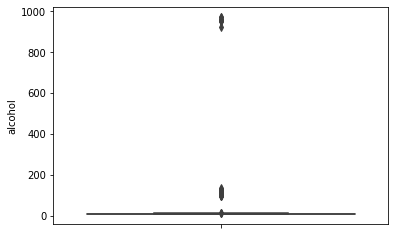

In [9]:
sns.boxplot(dados.alcohol, orient='vertical')

Podemos observar que existe uma variação muito grande dos dados desse atributo.

Vamos verificar a quantidade de valores que estão muito acima do normal (maiores que 100)

In [10]:
dados.alcohol[dados.alcohol > 100].count()

37

#### Por apresentar uma quantidade baixa de registros que estão muito além da variação, iremos remover as linhas em que o valor no atributo 'alcohol' é acima de 100

In [11]:
dados = dados[dados.alcohol < 100]

dados.shape

(6457, 14)

##### Visualizar novamente o boxplot para perceber o efeito da remoção dos valores altos

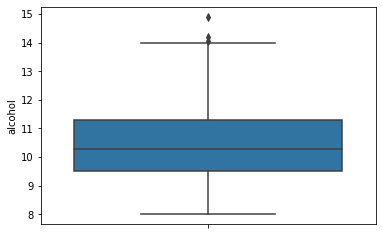

In [12]:
sns.boxplot(dados.alcohol, orient='vertical')

Podemos perceber que a remoção das linhas em que o valor do alcohol é maior do que 100, representou uma diminuição considerável da variação dos dados desse atributo

# Separar dados para validação dos modelos de predição

- 20% dos dados serão separados para serem usados como dados de validação dos modelos de predição. Esses dados de validação representam um conjunto de observações nunca vistos pelo modelo de predição.

- 80% dos dados serão utilizados para treinar e testar os modelos de predição. A separação dos dados de treino e teste será realizada na etapa posterior.

In [13]:
# Separar 20% dos dados para validação
treino, validacao = train_test_split(dados, test_size=0.2, random_state=1)

In [14]:
treino.shape

(5165, 14)

In [15]:
validacao.shape

(1292, 14)

Salvar os dados em arquivo CSV

In [16]:
treino.to_csv('dados/treino.csv', sep=';', index=False)

In [17]:
validacao.to_csv('dados/validacao.csv', sep=';', index=False)

****
# Próxima etapa: "Modeling"